# My Python cheat sheet 1
No ML models just pandas and matplotlib stuff

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
np.random.seed(42)

### Simple visualizations

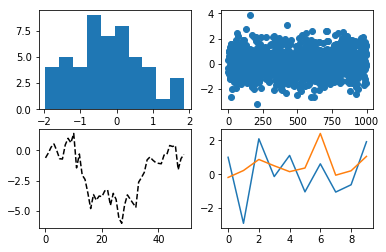

In [2]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.hist(np.random.randn(50))
ax2.scatter(np.arange(1000),np.random.randn(1000))
ax3.plot(np.random.randn(50).cumsum(), 'k--')
ax4.plot((np.random.randn(10)))

#you can add another value to ax
ax4.plot(np.random.randn(10))

### Pandas Mapping
Simple mapping also notice the str being called on the series.

In [3]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                                'Pastrami', 'corned beef', 'Bacon',
                               'pastrami', 'honey ham', 'nova lox'],
                      'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

#notice the str 
data['food'] = data['food'].str.lower()
data['animal']=data['food'].map(meat_to_animal)
#shwoing iloc over here
data.iloc[4:5,0:2]

,food,ounces
4,corned beef,7.5


### Simple read and plot
Also notice that I have inserted a rename using a dict. rename function in pandas requires column field to have the dict without which it will fail be warned.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
date     36 non-null datetime64[ns]
sales    36 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 656.0 bytes
None


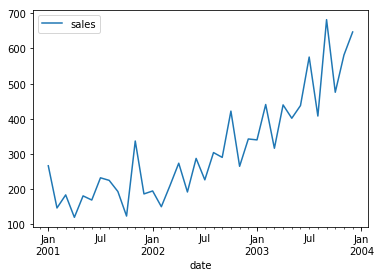

In [4]:
df=pd.read_csv('../../datasets/shampoo-sales.csv')
df.columns=['month','sales']
df['month']='200'+df['month']
df['month']=pd.to_datetime(df['month'], format='%Y-%m')
df.rename(columns={'month':'date'},inplace=True)

df.plot(y='sales',x='date')
print(df.info())
plt.show()

### Get all attributes for a datetime object
This is from fastai

In [5]:
import re
def add_datepart(df, fldname, drop=False):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [6]:
add_datepart(df, 'date')
df.head()

,date,sales,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,2001-01-01,266.0,2001,1,1,1,0,1,False,True,False,True,False,True,978307200
1,2001-02-01,145.9,2001,2,5,1,3,32,False,True,False,False,False,False,980985600
2,2001-03-01,183.1,2001,3,9,1,3,60,False,True,False,False,False,False,983404800
3,2001-04-01,119.3,2001,4,13,1,6,91,False,True,False,True,False,False,986083200
4,2001-05-01,180.3,2001,5,18,1,1,121,False,True,False,False,False,False,988675200


### Pandas group by apply example, with metrics for regression
Create a dataframe with dummy values

In [7]:
hour_of_day=np.random.randint(low=0,high=24,size=5000)
actual=np.linspace(50.0,600,5000)
#add predicted as a random gaussian with standard deviation 10
predicted=actual+np.random.randn(5000)*10.0
data=pd.DataFrame(list(zip(hour_of_day,actual,predicted)),columns=['hour_of_day','actual','predicted'])
data['hour_of_day'] = data['hour_of_day'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
hour_of_day    5000 non-null category
actual         5000 non-null float64
predicted      5000 non-null float64
dtypes: category(1), float64(2)
memory usage: 83.9 KB


#### Bloody bug in seaborn
Seaborn will treat ints as int even if you have converted into caretgorical. It basically gets confused. SO if you convert int to categorical you have to have legend =full else you get an error

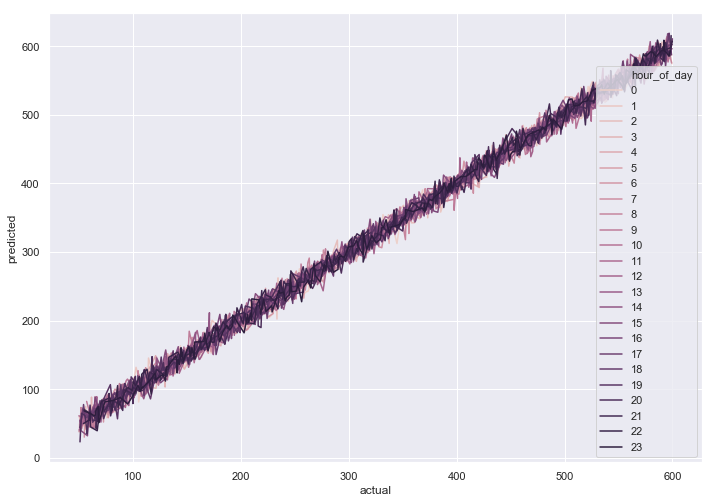

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x="actual", y="predicted", hue="hour_of_day",data=data,legend="full")

In [ ]:
def statistics_median(df):
    #mape
    abs_perc_error=np.abs(df["actual"]-df["predicted"])/df["actual"]
    abs_perc_error=abs_perc_error[abs_perc_error< np.percentile(abs_perc_error,99)]
    mape=abs_perc_error.mean()

    #square error
    sq_error = (df["actual"]-df["predicted"]) ** 2
    sq_error=sq_error[sq_error< np.percentile(sq_error,99)]
    sq_error=np.sqrt(sq_error.mean())
    
    #absolute error
    abs_error = np.abs(df["actual"]-df["predicted"])
    abs_error=abs_error[abs_error< np.percentile(abs_error,99)]
    mae=abs_error.mean()
    
    #bias
    bias=df["actual"]-df["predicted"]
    bias=bias[bias< np.percentile(bias,99)]
    bias=bias.mean()
    cols = ['mape','square_error','mae','bias','count']

    return pd.Series((mape,sq_error,mae,bias,df["actual"].size),index=cols)


In [ ]:
metrics=data.groupby('hour_of_day').apply(statistics_median)
metrics.reset_index(level=0, inplace=True)
metrics.head()

### Some group by stuff

In [ ]:
groups=data.groupby('hour_of_day')
type(data.groupby('hour_of_day'))

In [ ]:
for hour,df_hour in groups:
    print(hour,df_hour.shape)
groups.get_group(0).head()

In [ ]:
#groups.min(),groups.max()
groups.describe()

In [ ]:
groups.plot()